<a href="https://colab.research.google.com/github/elyorbek8/ML_journey/blob/main/intro_to_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/refs/heads/main/housing_LR.csv')
df.head()

,Unnamed: 0,district,rooms,size,level,max_levels,price
0,0,Юнусабадский,3,57.0,4,4,52000.0
1,1,Яккасарайский,2,52.0,4,5,56000.0
2,2,Чиланзарский,2,42.0,4,4,37000.0
3,3,Чиланзарский,3,65.0,1,4,49500.0
4,4,Чиланзарский,3,70.0,3,5,55000.0


In [14]:
df.drop('Unnamed: 0', axis= 1, inplace= True)
df.head()

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0


# Understanding the dataset

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7278 entries, 0 to 7277
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   district    7278 non-null   object 
 1   rooms       7278 non-null   int64  
 2   size        7278 non-null   float64
 3   level       7278 non-null   int64  
 4   max_levels  7278 non-null   int64  
 5   price       7278 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 341.3+ KB


In [18]:
df.describe()

,rooms,size,level,max_levels,price
count,7278.000000,7278.00000,7278.000000,7278.000000,7278.000000
mean,2.578318,70.11898,3.689338,5.992718,54092.074196
std,1.030179,29.32120,2.228360,2.583194,29665.210900
min,1.000000,1.00000,1.000000,1.000000,2.000000
25%,2.000000,50.00000,2.000000,4.000000,34800.000000
50%,2.000000,65.00000,3.000000,5.000000,45500.000000
75%,3.000000,83.00000,5.000000,9.000000,65000.000000
max,8.000000,279.00000,18.000000,25.000000,220000.000000


# Visualizing the dataset

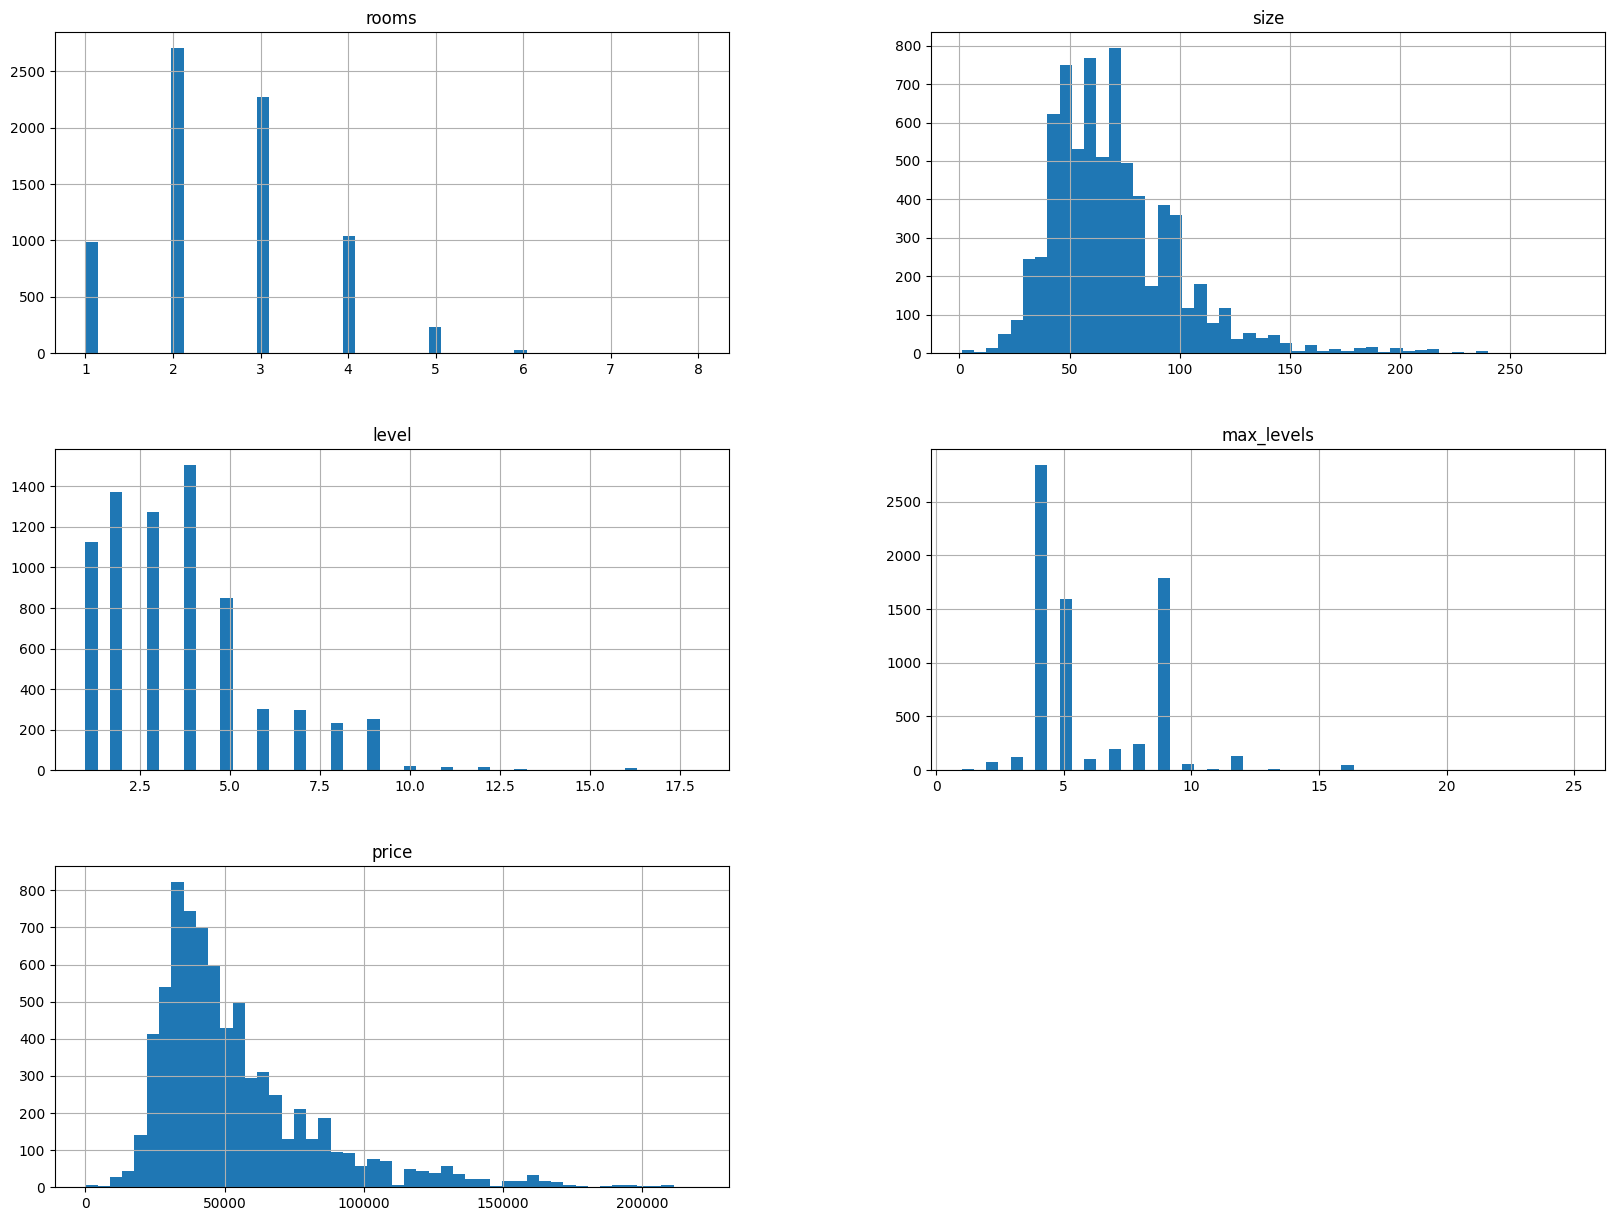

In [19]:
df.hist(bins= 50, figsize= (20, 15))
plt.show()

# Deviding the dataset into traning and test samples

In [39]:
df

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
...,...,...,...,...,...,...
7273,Яшнободский,1,38.0,5,5,24500.0
7274,Яшнободский,2,49.0,1,4,32000.0
7275,Шайхантахурский,2,64.0,3,9,40000.0
7276,Мирзо-Улугбекский,1,18.0,1,4,11000.0


In [36]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, train_size= 0.8, random_state= 12)

In [37]:
train_set.head(10)

,district,rooms,size,level,max_levels,price
3119,Чиланзарский,2,50.0,2,4,34500.0
3922,Юнусабадский,2,58.0,5,9,42000.0
2715,Олмазорский,2,58.0,6,8,42000.0
4999,Мирабадский,4,110.0,5,9,148000.0
2752,Учтепинский,1,34.0,4,4,22000.0
3331,Сергелийский,1,50.3,9,9,21660.0
5839,Чиланзарский,2,60.0,5,9,35000.0
6958,Юнусабадский,4,95.0,2,4,70000.0
3766,Мирабадский,3,85.0,5,9,74000.0
5710,Шайхантахурский,3,70.0,8,9,46000.0


In [38]:
test_set

,district,rooms,size,level,max_levels,price
4981,Олмазорский,2,68.0,4,7,55000.0
2099,Яккасарайский,2,54.0,2,9,29500.0
474,Чиланзарский,3,70.0,3,5,68000.0
1499,Мирзо-Улугбекский,3,78.0,1,4,39900.0
7088,Юнусабадский,1,28.0,3,4,26500.0
...,...,...,...,...,...,...
1097,Чиланзарский,5,109.0,5,5,83000.0
4174,Учтепинский,2,56.0,6,9,34400.0
1102,Шайхантахурский,3,70.0,4,9,56000.0
2866,Чиланзарский,2,52.0,1,4,40000.0


# Spliting the dataset test and train set while keeping a balance in the dataset.

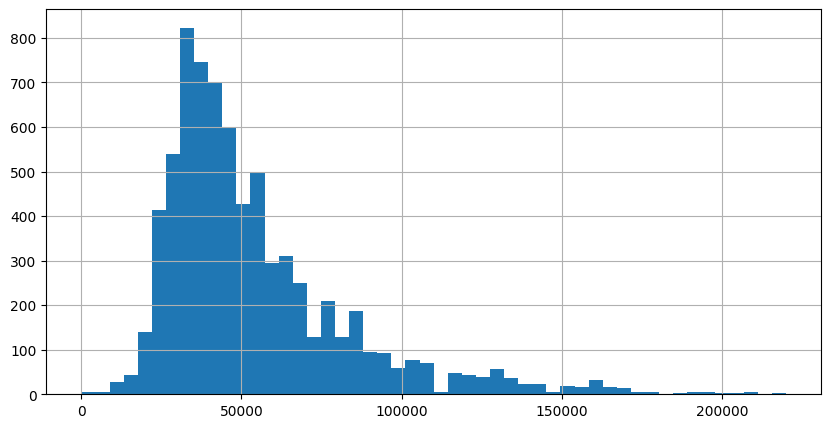

In [44]:
df['price'].hist(bins= 50, figsize= (10, 5))
plt.show()

In [45]:
df['price_group'] = pd.cut(df['price'], bins= [0, 25_000, 50_000, 80_000, np.inf], labels= [1, 2, 3, 4])
df.head()

,district,rooms,size,level,max_levels,price,price_group
0,Юнусабадский,3,57.0,4,4,52000.0,3
1,Яккасарайский,2,52.0,4,5,56000.0,3
2,Чиланзарский,2,42.0,4,4,37000.0,2
3,Чиланзарский,3,65.0,1,4,49500.0,2
4,Чиланзарский,3,70.0,3,5,55000.0,3


<Axes: >

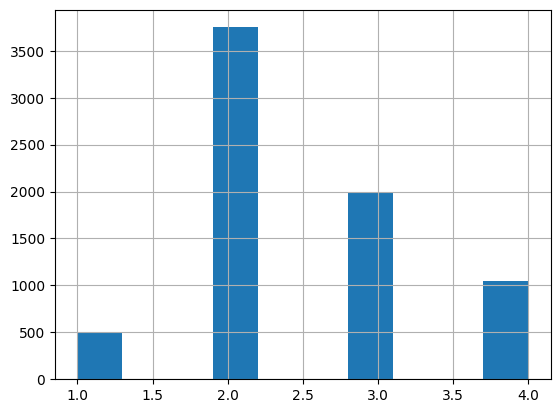

In [46]:
df['price_group'].hist()

In [53]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits= 1, test_size= 0.2, random_state= 21)
for train_index, test_index in stratified_split.split(df, df['price_group']):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]


In [54]:
strat_train_set.head()

,district,rooms,size,level,max_levels,price,price_group
3731,Чиланзарский,2,40.0,4,4,30000.0,2
25,Мирабадский,3,80.0,2,4,76000.0,3
4439,Мирабадский,3,85.0,7,9,64000.0,3
6036,Учтепинский,2,53.0,4,4,31500.0,2
7163,Яккасарайский,1,39.0,2,5,27000.0,2


<Axes: >

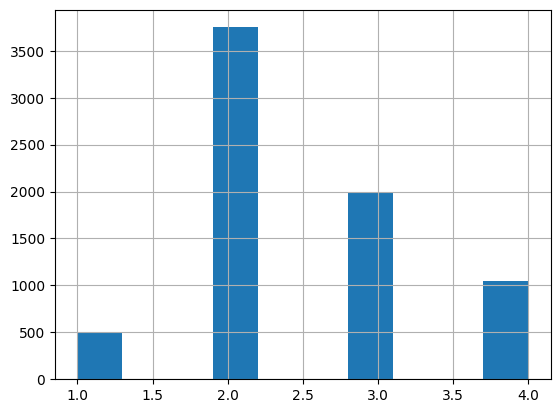

In [55]:
df['price_group'].hist()

<Axes: >

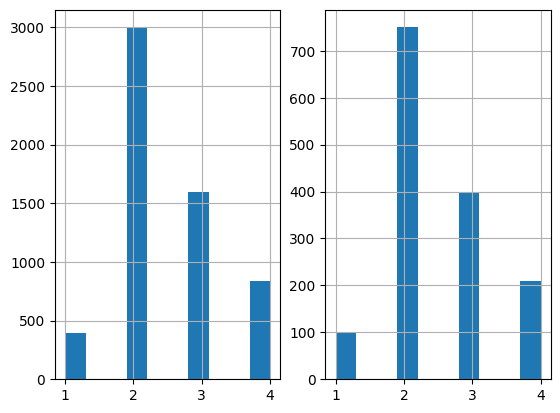

In [57]:
plt.subplot(1, 2, 1)
strat_train_set['price_group'].hist()

plt.subplot(1, 2, 2)
strat_test_set['price_group'].hist()

# droping price_group column

In [58]:
strat_train_set.drop('price_group', axis= 1, inplace= True)
strat_test_set.drop('price_group', axis= 1, inplace= True)

In [59]:
strat_train_set.head()

,district,rooms,size,level,max_levels,price
3731,Чиланзарский,2,40.0,4,4,30000.0
25,Мирабадский,3,80.0,2,4,76000.0
4439,Мирабадский,3,85.0,7,9,64000.0
6036,Учтепинский,2,53.0,4,4,31500.0
7163,Яккасарайский,1,39.0,2,5,27000.0


In [60]:
strat_test_set.head()

,district,rooms,size,level,max_levels,price
5672,Юнусабадский,3,78.0,2,5,52500.0
1174,Учтепинский,4,80.0,3,5,71000.0
6954,Шайхантахурский,3,75.0,9,9,39000.0
5056,Чиланзарский,2,50.0,4,4,33000.0
1512,Яшнободский,3,70.0,4,5,45500.0
